#QUESTION 1a

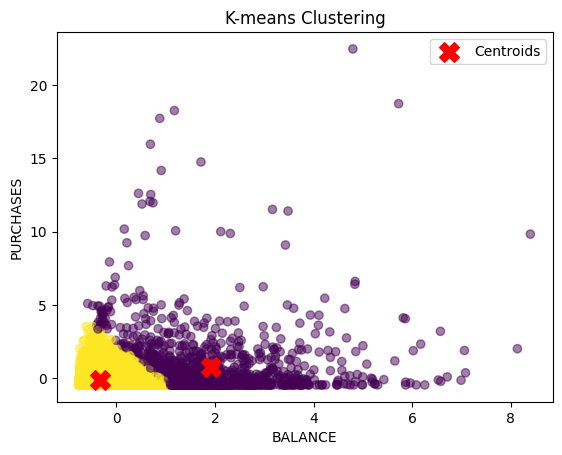

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices, :]
    return centroids

def assign_clusters(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

def update_centroids(data, clusters, k):
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

def plot_clusters(data, clusters, centroids):
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title('K-means Clustering')
    plt.xlabel('BALANCE')
    plt.ylabel('PURCHASES')
    plt.legend()
    plt.show()

data = pd.read_csv('CC.csv')

features = ['BALANCE', 'PURCHASES']
data = data[features].values

data = (data - data.mean(axis=0)) / data.std(axis=0)

k = 2
clusters, centroids = kmeans(data, k)

plot_clusters(data, clusters, centroids)


#QUESTION 1b

/Users/swatigupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/swatigupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/swatigupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/swatigupta/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

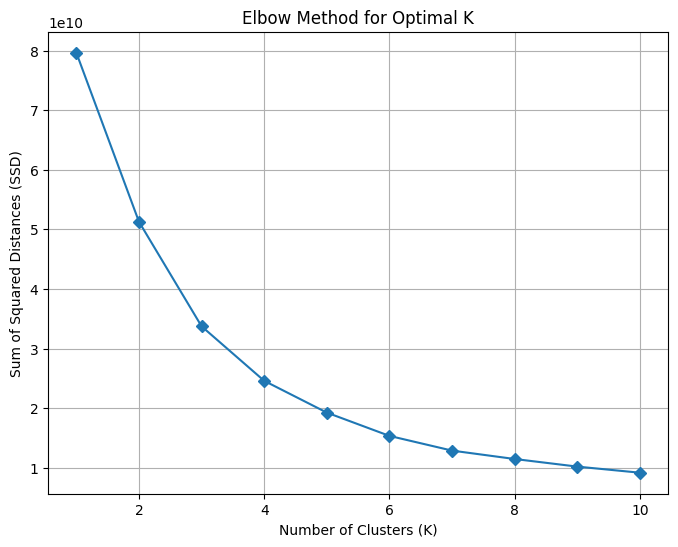

The elbow point is at K = 2


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('CC.csv')
X = data[['BALANCE', 'PURCHASES']].values
k_values = range(1, 11)
ssd = []

for k in k_values:
    kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=300, random_state=0)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, marker='D')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid()
plt.show()

diffs = np.diff(ssd)
elbow_point = k_values[np.argmin(diffs) + 1]
print(f'The elbow point is at K = {elbow_point}')

#QUESTION 1c

Cluster Centers:
       BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  1699.163257           0.828655   275.982719        201.486654   
1  1376.156440           0.945245  2019.990737       1139.056032   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               74.776276   1367.484801             0.194282   
1              881.262811    435.520033             0.904308   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.088504                          0.103382   
1                    0.361785                          0.729439   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.190003          4.563626       3.342085   4070.094352   
1                0.058442          1.410504      30.603966   5087.773380   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0  1413.674997        859.037455          0.070379  11.406861  
1  2179.818151        871.

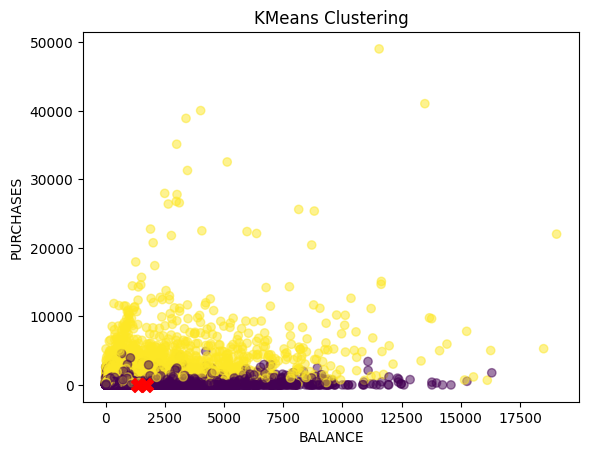

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "CC.csv" 
data = pd.read_csv(url)
features = data.iloc[:, 1:]  
features = features.fillna(features.mean())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)


optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(features_scaled)

print("Cluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns))

plt.scatter(features['BALANCE'], features['PURCHASES'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],s=100, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

In [3]:
print("Clusters from own implementation:")
print(clusters)
print("\nClusters from sklearn implementation:")
print(data['cluster'])

Clusters from own implementation:
[1 1 1 ... 1 1 1]

Clusters from sklearn implementation:
0       0
1       0
2       1
3       0
4       0
       ..
8945    1
8946    1
8947    0
8948    0
8949    0
Name: cluster, Length: 8950, dtype: int32
